In [1]:
import tensorflow as tf
#import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
import time


from emnist import extract_training_samples
from emnist import extract_test_samples
x_train, y_train = extract_training_samples("letters")
x_test, y_test = extract_test_samples("letters")
ep = 7


In [2]:
#(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
img_rec = x_train[30000:]

x_train = x_train[:30000]
y_train = y_train[:30000]

g = img_rec.copy()


In [3]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
img_rec = img_rec.reshape(img_rec.shape[0], 28, 28, 1)
input_shape = (28, 28,1)


In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
img_rec = img_rec.astype('float32')

In [6]:
x_train /= 255
x_test /= 255
img_rec /= 255

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [8]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(27,activation=tf.nn.softmax))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
t1 = time.time()

In [10]:
model.compile(optimizer='adam' 
              ,loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )
model.fit(x=x_train,y=y_train, epochs=ep)

Epoch 1/7
30000/30000 [==============================] - 5s 177us/sample - loss: 1.0511 - acc: 0.6842
Epoch 2/7
30000/30000 [==============================] - 5s 176us/sample - loss: 0.5656 - acc: 0.8208
Epoch 3/7
30000/30000 [==============================] - 5s 175us/sample - loss: 0.4372 - acc: 0.8584
Epoch 4/7
30000/30000 [==============================] - 5s 176us/sample - loss: 0.3709 - acc: 0.8768
Epoch 5/7
30000/30000 [==============================] - 5s 180us/sample - loss: 0.3225 - acc: 0.8928
Epoch 6/7
30000/30000 [==============================] - 5s 179us/sample - loss: 0.2914 - acc: 0.8977
Epoch 7/7
30000/30000 [==============================] - 5s 182us/sample - loss: 0.2634 - acc: 0.9087


In [11]:
t2 = time.time()


In [18]:
model.evaluate(x_test, y_test)
print("Training time = "+str(int(abs(t1-t2)))+ " seconds \nepochs = "+ str(ep))

20800/20800 [==============================] - 1s 53us/sample - loss: 0.3741 - acc: 0.8863
Training time = 37seconds 
epochs = 7


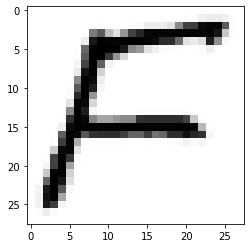

In [19]:
plt.imshow(g[4], cmap='Greys')

In [14]:
p = np.array([img_rec[4]])
a = model.predict(p)
print("The detected character is: "+str(chr(np.argmax(a)+96)))


The detected character is: f
